Based on a person's health and habits (like their BMI, blood pressure, daily steps, and hours of sleep), can a model predict if they are at a high or low risk of developing a chronic disease?

In [3]:
# Imports
import pandas as pd
import time
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load Data
df = pd.read_csv('health_lifestyle_dataset.csv')

Starting Logistic Regression training...
Training completed in: 0.0642 seconds
Model Accuracy: 0.49935

Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.50      0.60     15042
           1       0.25      0.49      0.33      4958

    accuracy                           0.50     20000
   macro avg       0.50      0.50      0.46     20000
weighted avg       0.62      0.50      0.53     20000



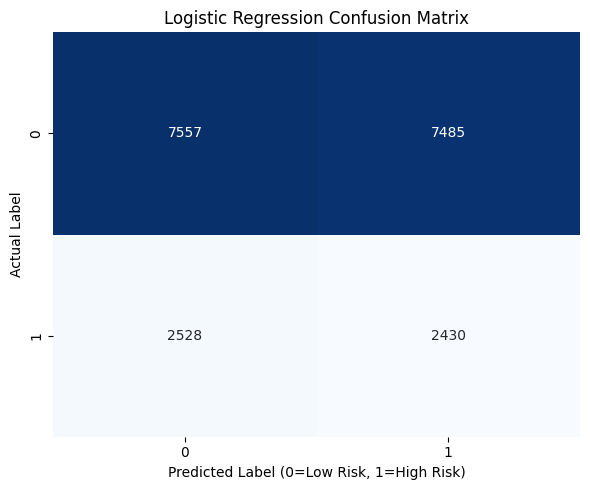

In [4]:
# Method 1 Logistic Regression
# Preprocessing
# Convert Gender to numbers (Male=1, Female=0)
le = LabelEncoder()
df['gender_encoded'] = le.fit_transform(df['gender'])

# Select Features (X) and Target (y)
features = ['bmi', 'daily_steps', 'sleep_hours', 'systolic_bp', 'diastolic_bp', 'gender_encoded', 'age']
X = df[features]
y = df['disease_risk']

# Split Data into Training and Testing sets
# Hides 20% of data (test set) to see if the model can predict new patients correctly.
# random_state=42 ensures the same split is used every time.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardizing the data so huge numbers (Steps: 10,000) don't overpower small ones (Sleep: 8).
# instead data is managed in terms of standard deviations
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize and Train the Model
# class_weight='balanced' helps if you have fewer 'Risk' cases than 'No Risk' cases
model = LogisticRegression(class_weight='balanced', random_state=42)

print("Starting Logistic Regression training...")
start_time = time.time()
model.fit(X_train_scaled, y_train)
end_time = time.time()

training_time = end_time - start_time
print(f"Training completed in: {training_time:.4f} seconds")

# Predict and Evaluate
y_pred = model.predict(X_test_scaled)

print("Model Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Creates Confusion Matrix
cm_lr = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Logistic Regression Confusion Matrix')
plt.xlabel('Predicted Label (0=Low Risk, 1=High Risk)')
plt.ylabel('Actual Label')
plt.tight_layout()
plt.savefig('logistic_confusion_matrix.png')

Starting Random Forest training...
Training completed in: 18.6190 seconds
Accuracy: 0.7517

Detailed Report:
               precision    recall  f1-score   support

           0       0.75      1.00      0.86     15042
           1       0.25      0.00      0.00      4958

    accuracy                           0.75     20000
   macro avg       0.50      0.50      0.43     20000
weighted avg       0.63      0.75      0.65     20000

Graph saved as 'rf_confusion_matrix.png'


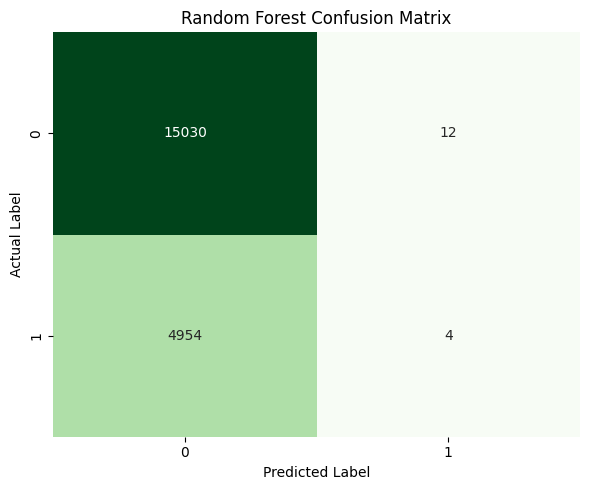

In [6]:
# Method 2 Random Forest
# Preprocessing
le = LabelEncoder()
df['gender_encoded'] = le.fit_transform(df['gender'])

# Select Features (X) and Target (y)
features = ['bmi', 'daily_steps', 'sleep_hours', 'systolic_bp', 'diastolic_bp', 'gender_encoded', 'age']
X = df[features]
y = df['disease_risk']

# Split Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Trains the Model (Using Random Forest for better accuracy)
# utilizes 100 decision trees and vote
model = RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42)

print("Starting Random Forest training...")
start_time = time.time()
model.fit(X_train_scaled, y_train)
end_time = time.time()
training_time = end_time - start_time
print(f"Training completed in: {training_time:.4f} seconds")

# Test the Model
y_pred = model.predict(X_test_scaled)

# Results
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nDetailed Report:\n", classification_report(y_test, y_pred))

# Creates Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', cbar=False)
plt.title('Random Forest Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.tight_layout()
plt.savefig('rf_confusion_matrix.png')

2. Is there a direct relationship between how much stress people feel and how much physical activity they get, and how well they sleep or how long they sleep?


Relationship between Stress and Health Habits:
              Sleep Duration  Quality of Sleep  Physical Activity Level
Stress Level                                                           
3                   8.226761          8.971831                54.718310
4                   7.030000          7.671429                55.785714
5                   7.483582          7.895522                74.253731
6                   7.454348          7.000000                67.152174
7                   6.468000          6.000000                43.840000
8                   6.050000          5.857143                58.342857


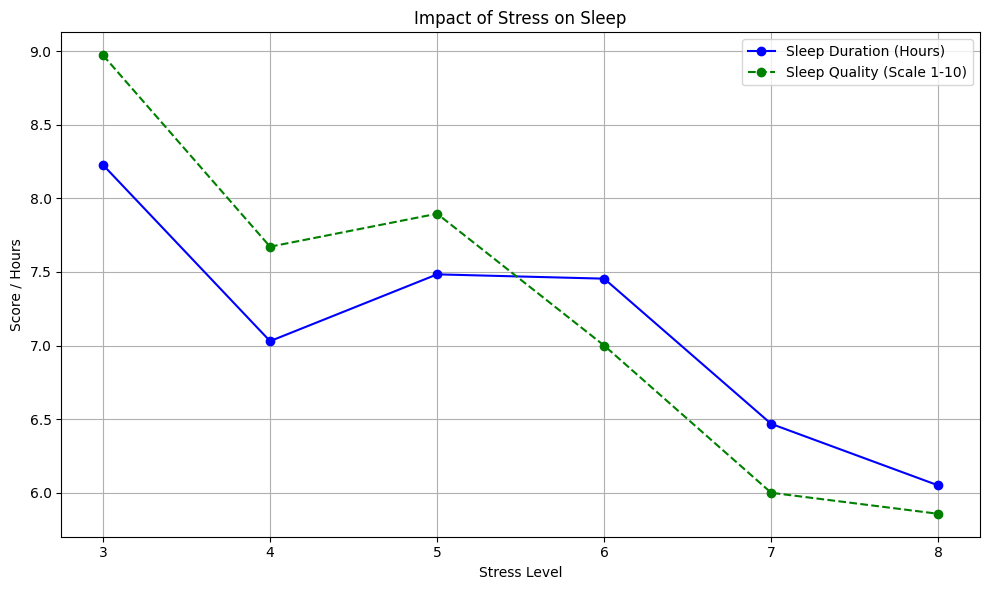

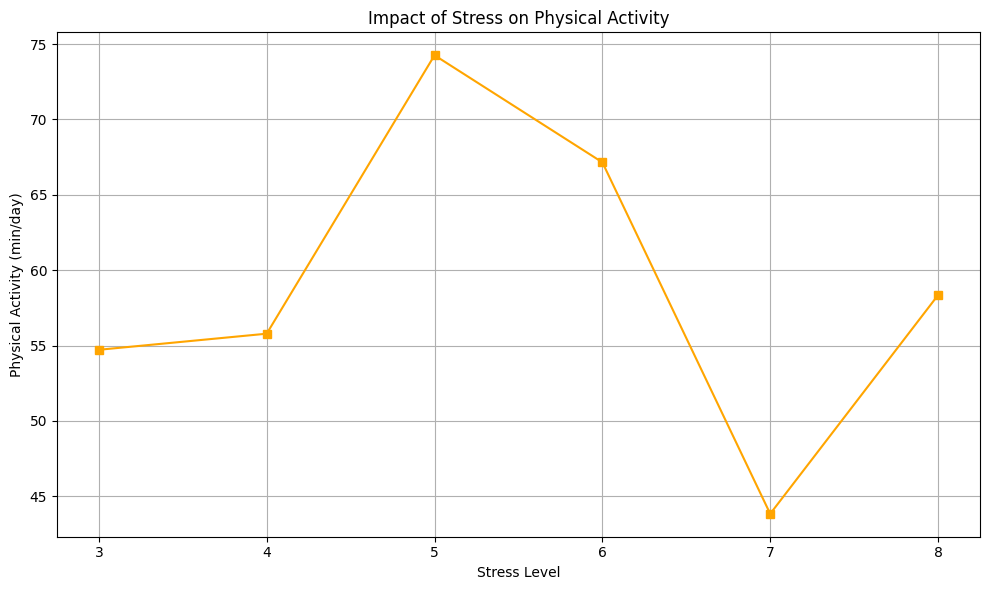

In [11]:
# Loads the dataset
df = pd.read_csv('Sleep_health_and_lifestyle_dataset.csv')

# Group by 'Stress Level'
# This calculates the average sleep and activity for each stress level (3-8)
grouped_data = df.groupby('Stress Level')[['Sleep Duration', 'Quality of Sleep', 'Physical Activity Level']].mean()

# Print grouped data table
print("Relationship between Stress and Health Habits:")
print(grouped_data)

# Visualization - Stress vs Sleep Duration and Sleep Quality
plt.figure(figsize=(10, 6))
plt.plot(grouped_data.index, grouped_data['Sleep Duration'], marker='o', label='Sleep Duration (Hours)', color='blue')
plt.plot(grouped_data.index, grouped_data['Quality of Sleep'], marker='o', label='Sleep Quality (Scale 1-10)', color='green', linestyle='--')

plt.title('Impact of Stress on Sleep')
plt.xlabel('Stress Level')
plt.ylabel('Score / Hours')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig('stress_sleep_trend.png')

# Visualization - Stress vs Physical Activity
plt.figure(figsize=(10, 6)) # Create a second, blank figure
plt.plot(grouped_data.index, grouped_data['Physical Activity Level'], marker='s', color='orange')

plt.title('Impact of Stress on Physical Activity')
plt.xlabel('Stress Level')
plt.ylabel('Physical Activity (min/day)')
plt.grid(True)
plt.tight_layout()
plt.savefig('stress_activity_trend.png') # Save the second file

Stress vs. Sleep: There is a clear negative relationship. As you look at the table/chart, you will see that as Stress Level goes up (from 3 to 8), the Sleep Duration drops significantly (from ~8.2 hours down to ~6.0 hours).

Stress vs. Activity: There is no clear linear relationship. The line goes up and down randomly. This suggests that how stressed a person is doesn't directly predict how much they exercise in this dataset.

Do certain job types appear to have a higher rate of specific sleep problems, such as insomnia or sleep apnea, compared to other occupations?

Sleep Disorder Rates (Percentage) by Occupation:
Sleep Disorder  Insomnia  None  Sleep Apnea
Occupation                                 
Nurse                4.1  12.3         83.6
Doctor               4.2  90.1          5.6
Engineer             7.9  90.5          1.6
Lawyer               4.3  89.4          6.4
Teacher             67.5  22.5         10.0
Accountant          18.9  81.1          0.0
Salesperson         90.6   6.2          3.1


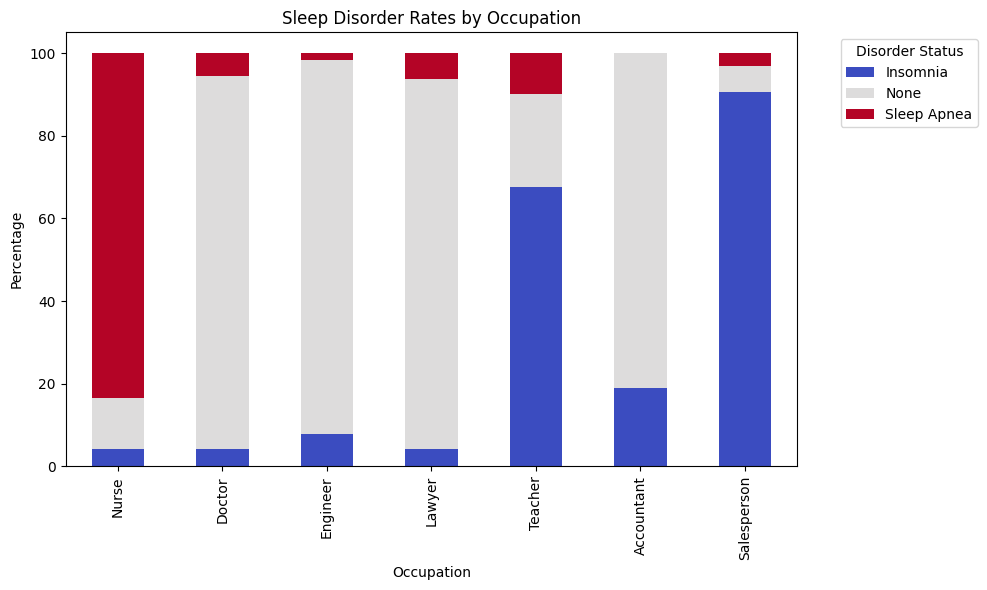

In [8]:
# Loads Data
df = pd.read_csv('Sleep_health_and_lifestyle_dataset.csv')

# Cleaning: Handle Missing Values
# In this dataset, 'NaN' means the person has NO sleep disorder.
# fill blanks with the string 'None' in order to count them
df['Sleep Disorder'] = df['Sleep Disorder'].fillna('None')

# The "Group & Pivot" Method
# Step A: Group by Job and Disorder, then count them (.size())
# Step B: Unstack moves 'Sleep Disorder' from being a row index to column headers
disorder_counts = df.groupby(['Occupation', 'Sleep Disorder']).size().unstack(fill_value=0)

# Filter
# Removes jobs with very few people (<10) to avoid false conclusions
valid_jobs = df['Occupation'].value_counts()
valid_jobs = valid_jobs[valid_jobs >= 10].index
disorder_counts = disorder_counts.loc[valid_jobs]

# Calculate Percentage (Normalize)
# Divide each row by the total count for that job
disorder_rates = disorder_counts.div(disorder_counts.sum(axis=1), axis=0) * 100

print("Sleep Disorder Rates (Percentage) by Occupation:")
print(disorder_rates.round(1))

# Visualization
disorder_rates.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='coolwarm')
plt.title('Sleep Disorder Rates by Occupation')
plt.ylabel('Percentage')
plt.legend(title='Disorder Status', bbox_to_anchor=(1.05, 1))
plt.tight_layout()
plt.savefig('occupation_sleep_disorder_v2.png')

Sleep Apnea is overwhelmingly common in Nurses (83.6%). This might be related to shift work or high-stress physical demands, combined with the fact that many nurses in this dataset are in the "Overweight" BMI category (which we could verify with another groupby).

Insomnia is the dominant issue for Salespersons (90.6%) and Teachers (67.5%).

Doctors, Engineers, and Lawyers are surprisingly the healthiest sleepers, with around 90% reporting no disorders at all.